# Linear Regression
## sklearn.datasets의 당뇨병 데이터

### 데이터 준비하기

In [225]:
from sklearn.datasets import load_diabetes
import pandas as pd
diabetes = load_diabetes()
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [226]:
df_X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_y = diabetes.target
X = df_X.values
y = df_y
print(X[:5])
print(y[:5])
print(X.shape)
print(y.shape)

[[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567061 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286377 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665645  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02269202 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187235  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03199144 -0.04664087]]
[151.  75. 141. 206. 135.]
(442, 10)
(442,)


In [227]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(353, 10)
(89, 10)
(353,)
(89,)


### Linear Regression Model 함수로 만들기

In [247]:
import numpy as np
W = np.random.randn(10)*50
b = np.random.rand()*100
print(W, b)

[   2.38204161   38.88254992   53.55672203 -103.87105597   -1.74245013
  -70.18913046    0.51238655   34.39476647 -101.42629326  -70.23376887] 71.49843254691469


In [229]:
def model(X,W,b):
    y_pred = 0
    for i in range(10):
        y_pred += X[:,i] * W[i]
    y_pred += b
    return y_pred       

In [230]:
def MSE(a,b):
    mse = ((a-b)**2).mean()
    return mse

In [231]:
def loss(X,W,b,y):
    y_pred = model(X,W,b)
    loss = MSE(y_pred, y)
    return loss

In [232]:
def gradient(X,W,b,y):
    N = len(X)
    y_pred = model(X,W,b)
    dW = 1/N * 2* X.T.dot(y_pred-y)
    db = 2 *(y_pred-y).mean()
    return dW, db

In [248]:
LEARNING_RATE = 0.01

losses = []

for i in range(1, 10001):
    dW, db = gradient(X_train,W,b,y_train)
    W = W - LEARNING_RATE * dW
    b = b - LEARNING_RATE * db
    L = loss(X_train,W,b,y_train)
    losses.append(L)
    if i % 500 == 0:
        print("iteration %d : Loss %0.4f" %(i,L))

iteration 500 : Loss 6381.8263
iteration 1000 : Loss 5966.1020
iteration 1500 : Loss 5611.2652
iteration 2000 : Loss 5307.6624
iteration 2500 : Loss 5047.2115
iteration 3000 : Loss 4823.1442
iteration 3500 : Loss 4629.7905
iteration 4000 : Loss 4462.3979
iteration 4500 : Loss 4316.9819
iteration 5000 : Loss 4190.1994
iteration 5500 : Loss 4079.2443
iteration 6000 : Loss 3981.7595
iteration 6500 : Loss 3895.7633
iteration 7000 : Loss 3819.5890
iteration 7500 : Loss 3751.8325
iteration 8000 : Loss 3691.3106
iteration 8500 : Loss 3637.0246
iteration 9000 : Loss 3588.1306
iteration 9500 : Loss 3543.9144
iteration 10000 : Loss 3503.7707


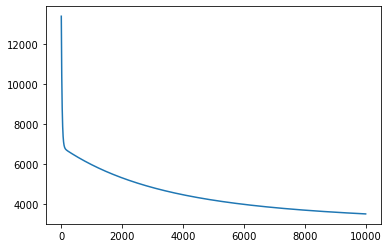

In [249]:
from matplotlib import pyplot as plt
plt.plot(losses)
plt.show()

In [250]:
W,b

(array([  73.51083297,  -12.53395084,  331.16927674,  130.86921698,
          56.72048642,  -48.82659552, -146.1744738 ,  184.97678961,
         158.86882956,   99.65874609]),
 152.30420853623954)

In [251]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

3163.9849743651243

## Linear Regression 라이브러리 사용하기

In [237]:
from sklearn.linear_model import LinearRegression

model_lib = LinearRegression()

In [238]:
model_lib.fit(X_train, y_train)

LinearRegression()

In [239]:
predictions = model_lib.predict(X_test)
predictions

array([139.5483133 , 179.52030578, 134.04133298, 291.41193598,
       123.78723656,  92.17357677, 258.23409704, 181.33895238,
        90.22217862, 108.63143298,  94.13938654, 168.43379636,
        53.50669663, 206.63040068, 100.13238561, 130.66881649,
       219.53270758, 250.78291772, 196.36682356, 218.57497401,
       207.35002447,  88.48361667,  70.43428801, 188.95725301,
       154.88720039, 159.35957695, 188.31587948, 180.38835506,
        47.98988446, 108.97514644, 174.78080029,  86.36598906,
       132.95890535, 184.5410226 , 173.83298051, 190.35863287,
       124.41740796, 119.65426903, 147.95402494,  59.05311211,
        71.62636914, 107.68722902, 165.45544477, 155.00784964,
       171.04558668,  61.45763075,  71.66975626, 114.96330486,
        51.57808027, 167.57781958, 152.52505798,  62.95827693,
       103.49862017, 109.20495627, 175.63844013, 154.60247734,
        94.41476124, 210.74244148, 120.25601864,  77.61590087,
       187.93503183, 206.49543321, 140.63018684, 105.59

In [240]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse

2900.1732878832318

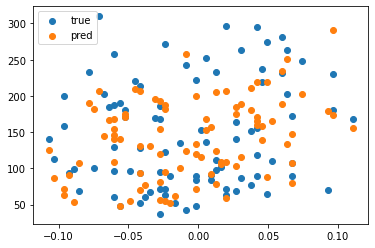

In [241]:
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], predictions, label="pred")
plt.legend()
plt.show()

## kaggle 데이터 자전거 대여량 예측
[데이터](https://www.kaggle.com/c/bike-sharing-demand/data)

In [377]:
import os
train_data = os.getenv("HOME")+("/aiffel/bike_regression/data/bike_train.csv")
train = pd.read_csv(train_data)
train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [378]:
datetime = pd.to_datetime(train.datetime)
train['year'] = pd.DatetimeIndex(datetime).year
train['month'] = pd.DatetimeIndex(datetime).month
train['day'] = pd.DatetimeIndex(datetime).day
train['hour'] = pd.DatetimeIndex(datetime).hour
train['minute'] = pd.DatetimeIndex(datetime).minute
train['second'] = pd.DatetimeIndex(datetime).second
train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,2012,12,19,23,0,0


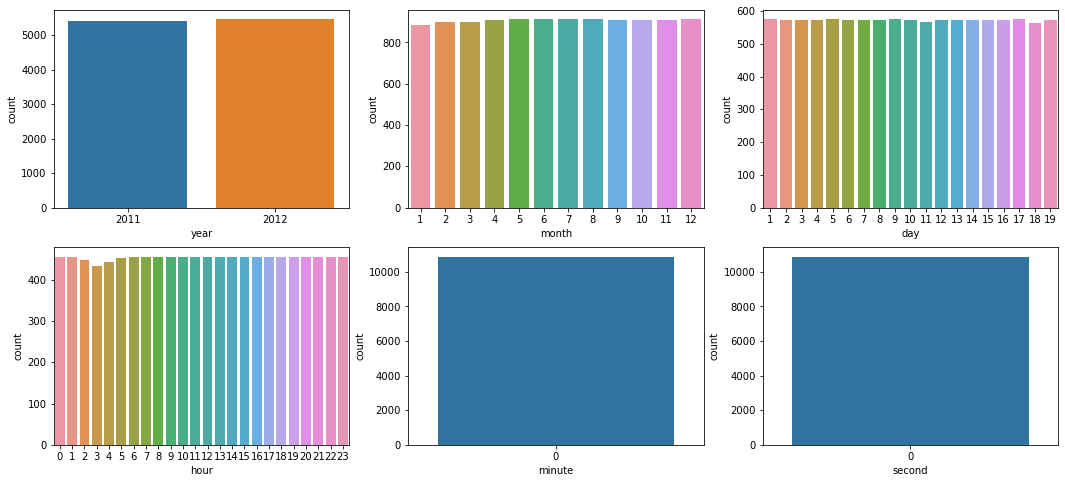

In [409]:
import seaborn as sns
%matplotlib inline

figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows = 2, ncols = 3)
figure.set_size_inches(18,8)
sns.countplot(train['year'], ax=ax1)
sns.countplot(train['month'], ax=ax2)
sns.countplot(train['day'], ax=ax3)
sns.countplot(train['hour'], ax=ax4)
sns.countplot(train['minute'], ax=ax5)
sns.countplot(train['second'], ax=ax6)

In [418]:
train = pd.get_dummies(train, columns=['holiday','weather'])

In [419]:
train.head()

,datetime,season,workingday,temp,atemp,humidity,windspeed,casual,registered,count,...,day,hour,minute,second,holiday_0,holiday_1,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,1,0,9.84,14.395,81,0.0,3,13,16,...,1,0,0,0,1,0,1,0,0,0
1,2011-01-01 01:00:00,1,0,9.02,13.635,80,0.0,8,32,40,...,1,1,0,0,1,0,1,0,0,0
2,2011-01-01 02:00:00,1,0,9.02,13.635,80,0.0,5,27,32,...,1,2,0,0,1,0,1,0,0,0
3,2011-01-01 03:00:00,1,0,9.84,14.395,75,0.0,3,10,13,...,1,3,0,0,1,0,1,0,0,0
4,2011-01-01 04:00:00,1,0,9.84,14.395,75,0.0,0,1,1,...,1,4,0,0,1,0,1,0,0,0


In [440]:
X = train[['holiday_0','holiday_1', 'weather_1','weather_2','weather_3','weather_4', 'temp', 'atemp', 'humidity', 'windspeed','month','hour']].values
y = train['count'].values

In [441]:
print(X.shape)
print(y.shape)
print(y[0])

(10886, 12)
(10886,)
16


In [442]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 19)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8708, 12)
(2178, 12)
(8708,)
(2178,)


In [444]:
model_for_bike = LinearRegression()
model_for_bike.fit(X_train, y_train)

LinearRegression()

In [445]:
y_pred = model_for_bike.predict(X_test)
print(y_pred)

[219.54901331 139.94914238 257.27504737 ... 240.24768376 109.99236605
  77.93495619]


In [446]:
mse = mean_squared_error(y_pred, y_test)
rmse = mse**(0.5)
print("mse: {}, rmse: {}".format(mse, rmse))

mse: 20186.243289905262, rmse: 142.07829985576709


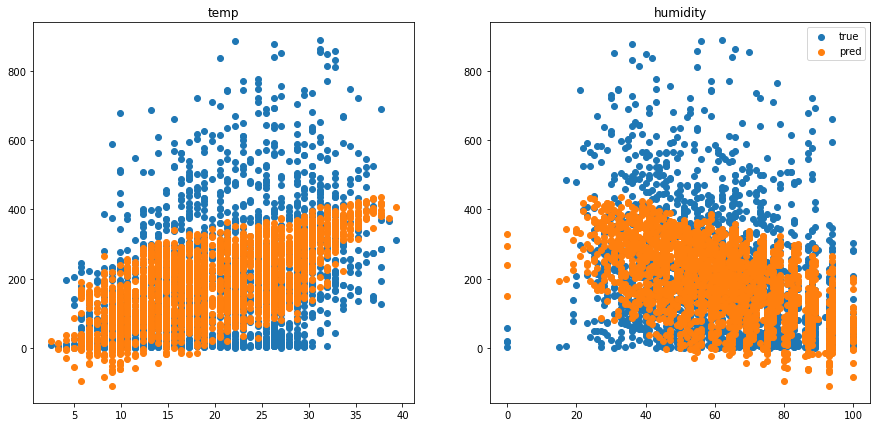

In [447]:
fig = plt.figure(figsize =(15,7))
ax1 = fig.add_subplot(1,2,1)
plt.scatter(X_test[:,6], y_test, label = "true")
plt.scatter(X_test[:,6], y_pred, label="pred")
plt.title("temp")
ax2 = fig.add_subplot(1,2,2)
plt.scatter(X_test[:,8], y_test, label = "true")
plt.scatter(X_test[:,8], y_pred, label="pred")
plt.title("humidity")
plt.legend()
3plt.show()

## 느낀점
- seasons이라는 변수는 봄, 여름, 가을, 겨울 (0,1,2,3)로 범주형 변수이다.
- 범주형 변수를 원핫인코딩을 해주는 것과 그대로 (0,1,2,3)으로 쓰는 것이 결과에 미치는 영향을 모르겠다. 범주형으로 바꾸어 보았지만, 결과상 달라지는 것이 없어보인다. 그렇다면 원핫인코딩은 왜 하는 걸까. 계산량을 줄여주기 위한 목적이띾?
- 특히, hour 같은 경우는 원핫인코딩 시, 24개의 column으로 나뉘어진다. 또한, hour 전체에 대한 영향을 보기는 힘든 것 같다. hour 내 개별 element의 영향력을 따로 보게 되는 것 같다.